## Time series forecasting the main aim of this project is to minimizeModel error 1-Mean Absolute Error 2-Root Mean Squared Error 3-Mean Absolute percentage Error

## import libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime
from datetime import date
import random
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import gc
import ast

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


## check the distribution of the target column

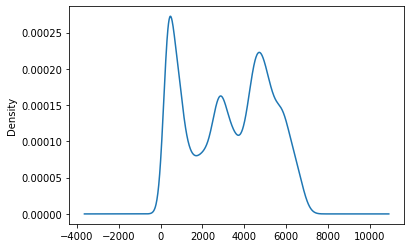

In [5]:
df['traffic_volume'].plot.kde()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


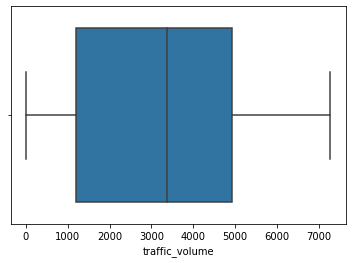

In [6]:
sns.boxplot(df['traffic_volume'])

check the holidy column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

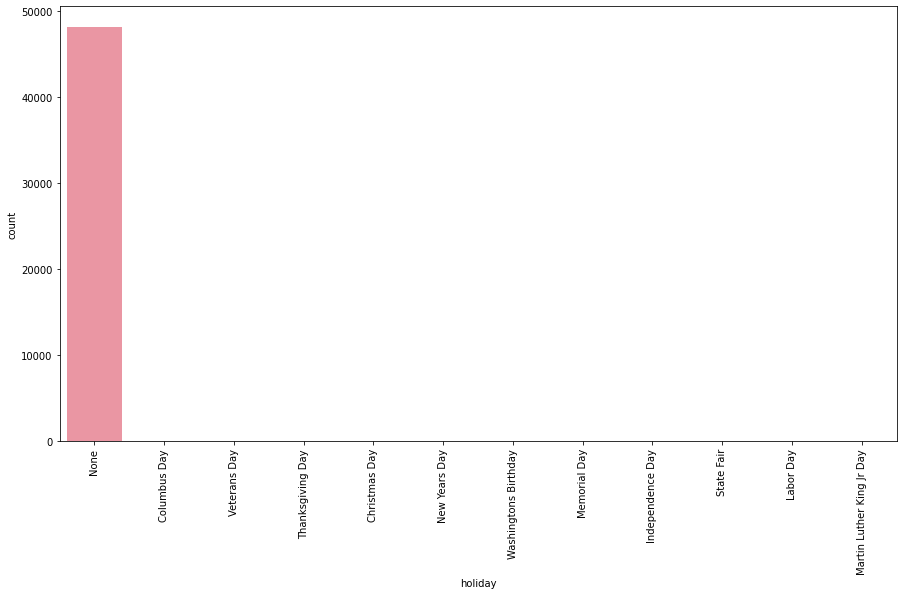

In [7]:
plt.figure(figsize = [15,8])
sns.countplot(df['holiday'])
plt.xticks(rotation = 90)

## convert the date time column to datetime format

In [8]:
df['date_time'] =  pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


## create a new column to get the day name

In [10]:
df['Dayofweek']=df['date_time'].dt.day_name()

In [11]:
# i want to see which day has most values of traffic and lowest values of traffic so we will agg with five values
df.groupby('Dayofweek')['traffic_volume'].agg(['mean','count','min','max','sum'])

,mean,count,min,max,sum
Dayofweek,,,,,
Friday,3656.358836,6836,10,7241,24994869
Monday,3309.387161,7072,123,7117,23403986
Saturday,2773.638120,6831,0,6470,18946722
Sunday,2368.588329,6872,3,6645,16276939
Thursday,3637.899663,6817,1,7280,24799562
Tuesday,3488.555799,6846,125,7217,23882653
Wednesday,3583.196681,6930,1,7192,24831553


### As we see above saturday and sunday has the lowest traffic compare to the rest of days because of the weekends

In [12]:
# we will sort data frame in acending order because we will deal with time series data
df_sorted=df.sort_values(by='date_time')

In [13]:
# we here set date time column as index of data frame
df_sorted = df_sorted.set_index(pd.DatetimeIndex(df_sorted['date_time']))

In [14]:
# show the first five rows
df_sorted.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Dayofweek
date_time,,,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,Tuesday
2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,Tuesday
2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,Tuesday
2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,Tuesday
2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,Tuesday


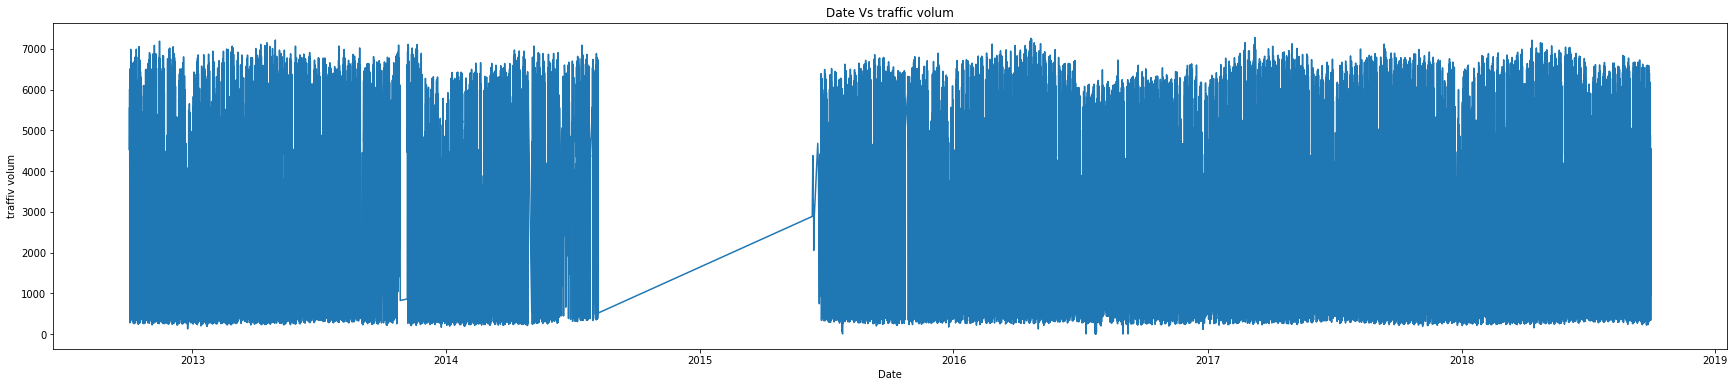

In [15]:
# plot Date Vs traffic
plt.figure(figsize=(30,6))
plt.plot(df_sorted['date_time'],df_sorted['traffic_volume'])
plt.xlabel('Date')
plt.ylabel('traffiv volum')
plt.title('Date Vs traffic volum')
plt.show()

## now we will take some of this data to study it

In [16]:
portion_df = df_sorted.traffic_volume['2017-09-29':'2018-09-29']

In [17]:
portion_df

date_time
2017-09-29 00:00:00     751
2017-09-29 01:00:00     432
2017-09-29 02:00:00     310
2017-09-29 03:00:00     348
2017-09-29 04:00:00     860
                       ... 
2018-09-29 19:00:00    3818
2018-09-29 20:00:00    3338
2018-09-29 21:00:00    2950
2018-09-29 22:00:00    2607
2018-09-29 23:00:00    3856
Name: traffic_volume, Length: 10626, dtype: int64

## split the data into train test in order matter

In [18]:
split_date = '2018-08-30'
ts_train = portion_df.loc[portion_df.index <= split_date].copy()
ts_test = portion_df.loc[portion_df.index > split_date].copy()

## check this data if stationary or not

In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(168).mean()
    rolstd = timeseries.rolling(168).std()

    #Plot rolling statistics:
    plt.figure(figsize=(30,6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

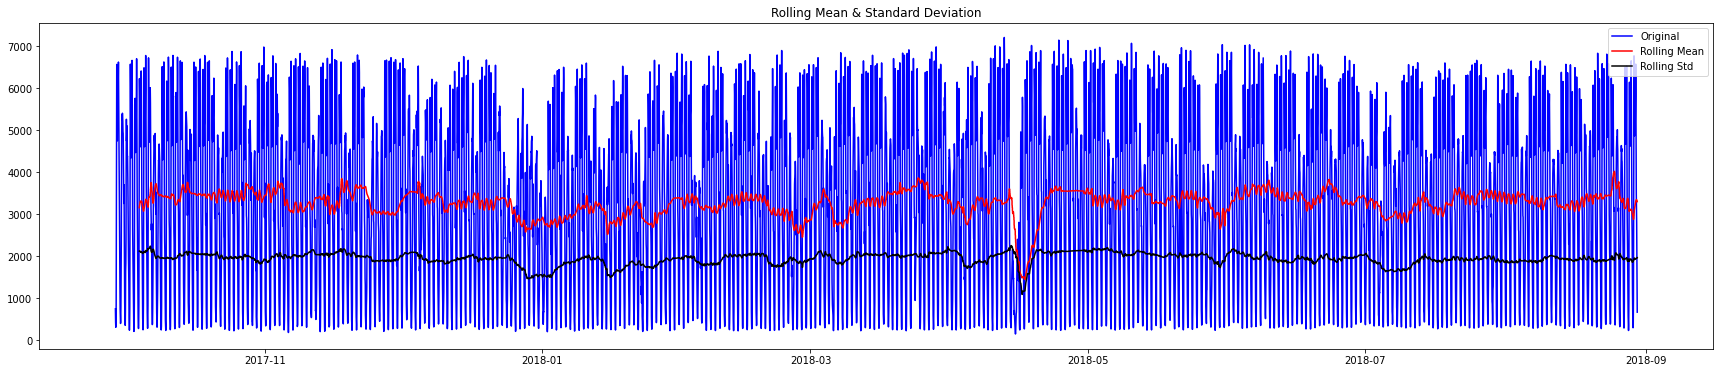

Results of Dickey-Fuller Test:
Test Statistic                -1.548486e+01
p-value                        2.528511e-28
#Lags Used                     3.300000e+01
Number of Observations Used    9.624000e+03
Critical Value (1%)           -3.431030e+00
Critical Value (5%)           -2.861840e+00
Critical Value (10%)          -2.566930e+00
dtype: float64


In [20]:
test_stationarity(ts_train)

## as we see from the graph above the mean of the data is almost constnant wit time so our data is stationary check this link for more understanding about dickey fuller test https://analyticsindiamag.com/complete-guide-to-dickey-fuller-test-in-time-series-analysis/

## now we are building ARIMA model so we need to choose the P q d value so d is zero because our data is stationary

In [21]:
# ACF and PACF plots
lag = 168
lag_pacf = pacf(ts_train, nlags=lag, method='ols')
lag_acf = acf(ts_train, nlags=lag)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


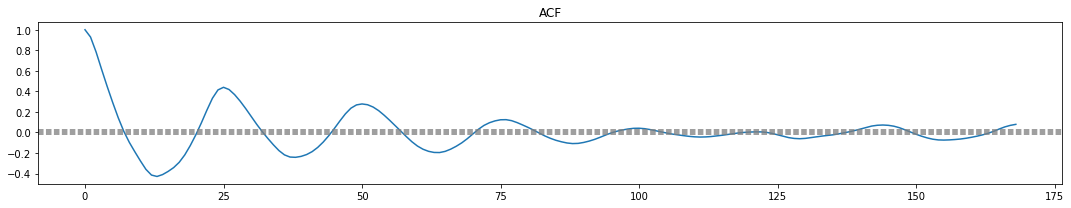

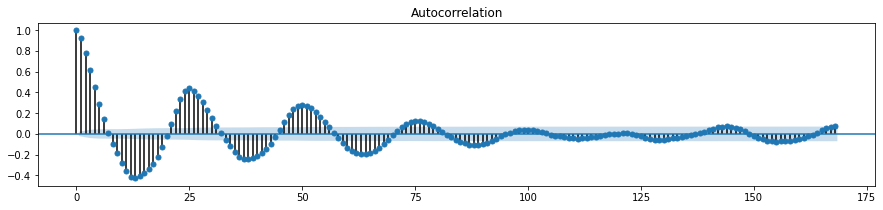

In [22]:
#Plot ACF auto corrletion function 
plt.figure(figsize=(15,3))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(portion_df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(portion_df)),linestyle='--',color='gray')
plt.title('ACF')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,3))
plot_acf(ts_train, ax=plt.gca(),lags=lag)
plt.show()

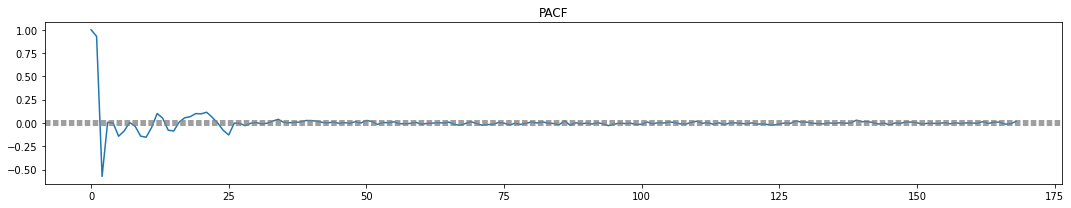

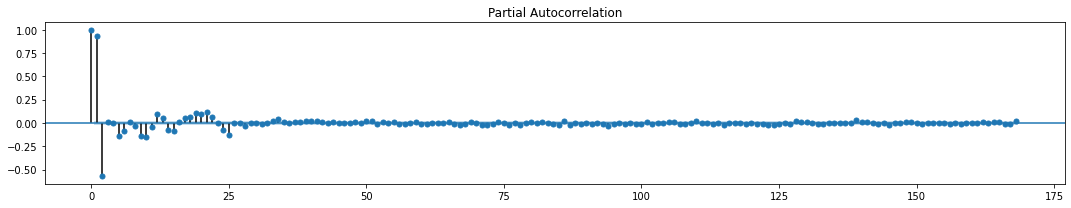

In [23]:
#Plot PACF partial auto corrletion function
plt.figure(figsize=(15,3))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(portion_df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(portion_df)),linestyle='--',color='gray')
plt.title('PACF')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,3))
plot_pacf(ts_train, ax=plt.gca(), lags=lag)
plt.tight_layout()
plt.show()

In [24]:
p=1 # from PACF Curve
q=7 # from ACF Curve
d=0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


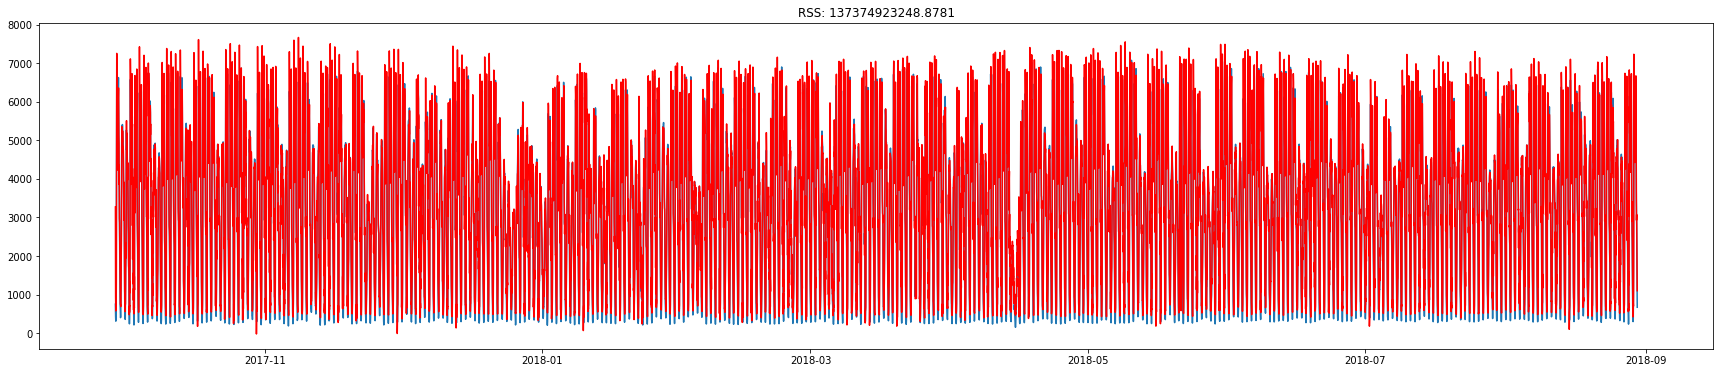

In [25]:
# ARIMA auto autoregressive integrated moving average
model = ARIMA(ts_train, order=(p, d, q))  
results_ARIMA = model.fit(disp=1)
plt.figure(figsize=(30,6))
plt.plot(ts_train)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues).dropna()**2))
plt.show()

In [26]:
# summury of our model
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:         traffic_volume   No. Observations:                 9658
Model:                     ARMA(1, 7)   Log Likelihood              -75380.274
Method:                       css-mle   S.D. of innovations            593.399
Date:                Sat, 23 Jul 2022   AIC                         150780.548
Time:                        07:32:47   BIC                         150852.303
Sample:                             0   HQIC                        150804.878
                                                                              
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3271.8814     54.763     59.746      0.000    3164.548    3379.214
ar.L1.traffic_volume     0.3852      0.044      8.853      0.000       0.300       0.470
ma.L1.traffic_volume     1.0799      0.042     25.523      0.000       0.997       1.163
ma.L2.traffic_volume     1.0354      0.063     16.507      0.000       0.912       1.158
ma.L3.traffic_volume     0.8270      0.071     11.581      0.000       0.687       0.967
ma.L4.traffic_volume     0.6510      0.066      9.921      0.000       0.522       0.780
ma.L5.traffic_volume     0.5081      0.051     10.003      0.000       0.409       0.608
ma.L6.traffic_volume     0.3355      0.033     10.254      0.000       0.271       0.400
ma.L7.traffic_volume     0.1409      0.017      8.509      0.000       0.108       0.173
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5961           +0.0000j            2.5961            0.0000
MA.1            0.7582           -1.0095j            1.2625           -0.1475
MA.2            0.7582           +1.0095j            1.2625            0.1475
MA.3           -0.2068           -1.2609j            1.2778           -0.2759
MA.4           -0.2068           +1.2609j            1.2778            0.2759
MA.5           -1.0299           -0.9243j            1.3839           -0.3836
MA.6           -1.0299           +0.9243j            1.3839            0.3836
MA.7           -1.4240           -0.0000j            1.4240           -0.5000
-----------------------------------------------------------------------------
"""

## Residual plot

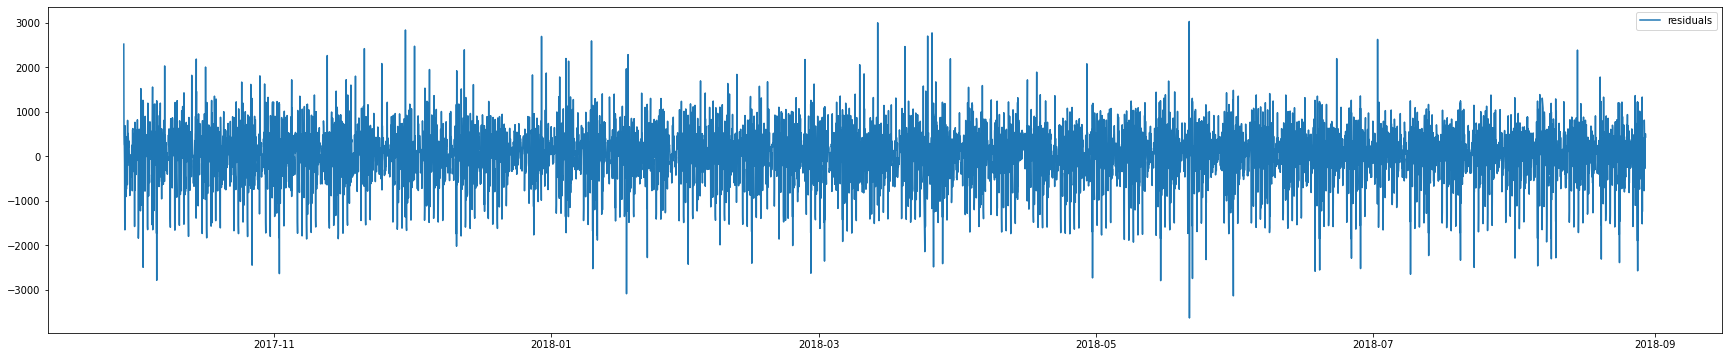

In [27]:
x = pd.DataFrame(results_ARIMA.fittedvalues)
x.columns = ['traffic_volume']
x = x.traffic_volume - ts_train
plt.figure(figsize=(30,6))
plt.plot(x, label='residuals')
plt.legend(loc='best')
plt.show()

## test the ARIMA model on test dataset

In [28]:
# define function to get perdiction for forecasting
def StartARIMAForecasting(Actual, p, d, q):
	model = ARIMA(Actual, order=(p, d, q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction

In [29]:
#new arrays to store actual and predictions
Actual = [x for x in ts_train]
Predictions = list()

#in a for loop, predict values using ARIMA model
for timepoint in range(len(ts_test)):
	ActualValue =  ts_test[timepoint]
	#forcast value
	Prediction = StartARIMAForecasting(Actual, 3,1,0)    
	print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
	#add it in the list
	Predictions.append(Prediction)
	Actual.append(ActualValue)  
 
predictions=pd.DataFrame(Predictions).set_index(ts_test.index)

Actual=456.000000, Predicted=451.471286
Actual=326.000000, Predicted=457.903029
Actual=388.000000, Predicted=327.377256
Actual=388.000000, Predicted=453.416688
Actual=1008.000000, Predicted=397.433549
Actual=1008.000000, Predicted=1354.244770
Actual=3070.000000, Predicted=969.015575
Actual=5886.000000, Predicted=4178.446196
Actual=6466.000000, Predicted=7359.556428
Actual=6466.000000, Predicted=6406.672519
Actual=5995.000000, Predicted=6141.210969
Actual=5467.000000, Predicted=5667.862650
Actual=4911.000000, Predicted=5196.665908
Actual=5095.000000, Predicted=4676.585347
Actual=5308.000000, Predicted=5289.331402
Actual=5213.000000, Predicted=5474.864332
Actual=5680.000000, Predicted=5126.858869
Actual=6238.000000, Predicted=5930.203416
Actual=6453.000000, Predicted=6536.012386
Actual=5775.000000, Predicted=6492.472694
Actual=4531.000000, Predicted=5318.652829
Actual=3884.000000, Predicted=3844.151358
Actual=3332.000000, Predicted=3664.484505
Actual=3049.000000, Predicted=3186.624029
Ac

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=4462.000000, Predicted=4943.654401
Actual=5016.000000, Predicted=4271.883625
Actual=5688.000000, Predicted=5317.679533
Actual=6344.000000, Predicted=6063.173854
Actual=5857.000000, Predicted=6618.544208
Actual=4245.000000, Predicted=5478.259537
Actual=3184.000000, Predicted=3297.433773
Actual=2732.000000, Predicted=2726.350802
Actual=2235.000000, Predicted=2704.483654
Actual=1389.000000, Predicted=2091.390560
Actual=887.000000, Predicted=987.915856
Actual=516.000000, Predicted=702.687435
Actual=330.000000, Predicted=423.107367
Actual=265.000000, Predicted=297.987744
Actual=332.000000, Predicted=277.270338
Actual=891.000000, Predicted=392.559574
Actual=3055.000000, Predicted=1208.209642
Actual=5927.000000, Predicted=4234.057082
Actual=6496.000000, Predicted=7367.564874
Actual=6123.000000, Predicted=6433.648008
Actual=5471.000000, Predicted=5582.279777
Actual=4257.000000, Predicted=5065.446116
Actual=5074.000000, Predicted=3648.911477
Actual=4734.000000, Predicted=5668.209854
Actu

In [30]:
# define function calculate Mean Absolute percentage Error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [31]:
#Calculate Model error 1-Mean Absolute Error 2-Root Mean Squared Error 3-Mean Absolute percentage Error
print('Test Mean Absolute Error:', mean_absolute_error(ts_test, predictions))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(ts_test, predictions)))
print('Test Mean Absolute percentage Error:',mean_absolute_percentage_error(ts_test, predictions[0]))

Test Mean Absolute Error: 429.5161312457795
Test Root Mean Squared Error: 644.0854091379808
Test Mean Absolute percentage Error: 19.07707269113014


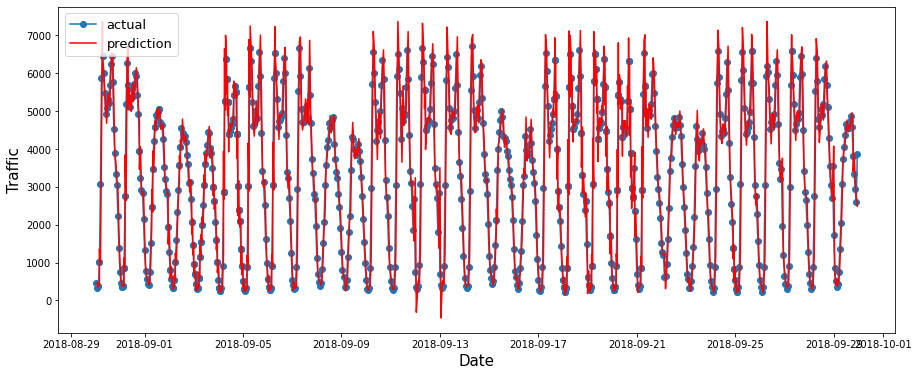

In [32]:
# plot actual value vs predicted
plt.figure(figsize=(15,6))
plt.plot(ts_test.index, ts_test, marker='o', label="actual")
plt.plot(ts_test.index, Predictions, 'r', label="prediction")
plt.ylabel('Traffic', size=15)
plt.xlabel('Date', size=15)
plt.legend(fontsize=13)
plt.show()

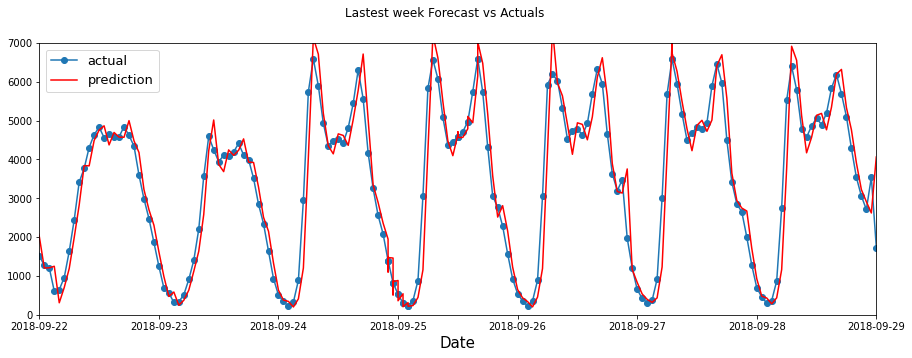

In [33]:
# zoom on lastest week
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
plt.plot(ts_test.index, ts_test, marker='o', label="actual")
plt.plot(ts_test.index, Predictions, 'r', label="prediction")
ax.set_xbound(lower= datetime.date(2018,9,22), upper=datetime.date(2018,9,29))
plt.legend(fontsize=13)
plt.xlabel('Date', size=15)
ax.set_ylim(0, 7000)
plot = plt.suptitle('Lastest week Forecast vs Actuals')

In [34]:
ts_test

date_time
2018-08-30 01:00:00     456
2018-08-30 02:00:00     326
2018-08-30 03:00:00     388
2018-08-30 03:00:00     388
2018-08-30 04:00:00    1008
                       ... 
2018-09-29 19:00:00    3818
2018-09-29 20:00:00    3338
2018-09-29 21:00:00    2950
2018-09-29 22:00:00    2607
2018-09-29 23:00:00    3856
Name: traffic_volume, Length: 968, dtype: int64

In [35]:
# get the next 8 hours of Traffic
from dateutil.relativedelta import relativedelta
start= datetime.datetime.strptime("2018-09-29 23:00:00","%Y-%m-%d %H:%M:%S")
date_list=[start + relativedelta(hours=x) for x in range(0,8)]
future_predictions=pd.DataFrame(index=date_list,columns=df.columns)

In [36]:
# concat the test data with the next 8 houre to predict the future data
data=pd.concat([ts_test,future_predictions],axis=0)

In [37]:
data=data.iloc[:,0]

In [38]:
data

2018-08-30 01:00:00     456.0
2018-08-30 02:00:00     326.0
2018-08-30 03:00:00     388.0
2018-08-30 03:00:00     388.0
2018-08-30 04:00:00    1008.0
                        ...  
2018-09-30 02:00:00       NaN
2018-09-30 03:00:00       NaN
2018-09-30 04:00:00       NaN
2018-09-30 05:00:00       NaN
2018-09-30 06:00:00       NaN
Name: 0, Length: 976, dtype: float64

In [39]:
data.isnull().sum()

8

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


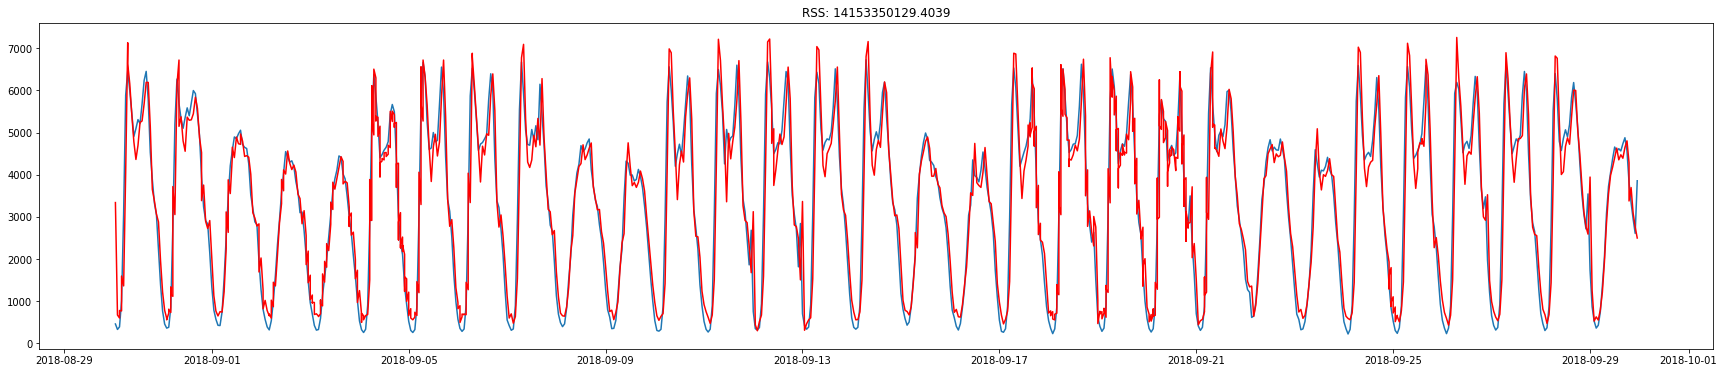

In [40]:
# ARIMA auto autoregressive integrated moving average
model = ARIMA(ts_test, order=(p, d, q))  
results_ARIMA = model.fit(disp=1)
plt.figure(figsize=(30,6))
plt.plot(ts_test)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues).dropna()**2))
plt.show()

In [41]:
#get prediction of the next 8 hours
pred=results_ARIMA.predict(start=len(ts_test),end=len(data)-1,dynamic=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [42]:
len(pred)

8

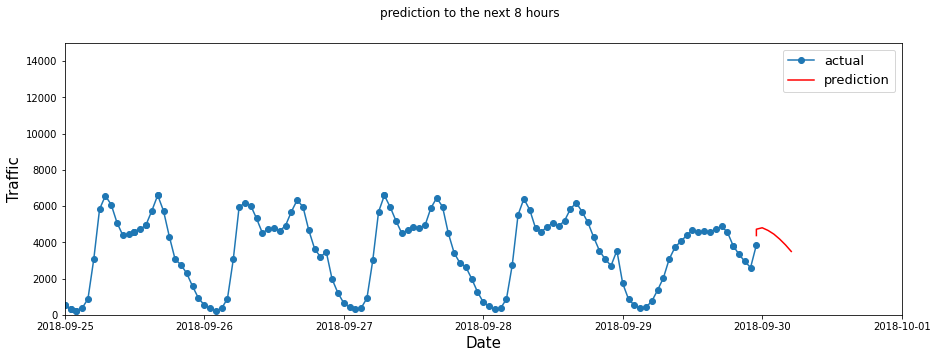

In [43]:
# plot prediction for next 8 hours
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
plt.plot(ts_test.index, ts_test, marker='o', label="actual")
plt.plot(data['2018-09-29 23:00:00':'	2018-09-30 05:00:00'].index, pred, 'r',label="prediction")
ax.set_xbound(lower= datetime.date(2018,9,25), upper=datetime.date(2018,10,1))
plt.legend(fontsize=13)
plt.xlabel('Date', size=15)
plt.ylabel('Traffic',size = 15)
ax.set_ylim(0, 15000)
plot = plt.suptitle('prediction to the next 8 hours')

In [44]:
# save future data 
Future ={'Datetime':date_list,'traffic':list(np.array(pred,dtype=int))}

In [45]:
Future

{'Datetime': [datetime.datetime(2018, 9, 29, 23, 0),
  datetime.datetime(2018, 9, 30, 0, 0),
  datetime.datetime(2018, 9, 30, 1, 0),
  datetime.datetime(2018, 9, 30, 2, 0),
  datetime.datetime(2018, 9, 30, 3, 0),
  datetime.datetime(2018, 9, 30, 4, 0),
  datetime.datetime(2018, 9, 30, 5, 0),
  datetime.datetime(2018, 9, 30, 6, 0)],
 'traffic': [4372, 4723, 4803, 4656, 4453, 4179, 3860, 3495]}

In [46]:
df_future_8hours=pd.DataFrame(Future)
df_future_8hours

,Datetime,traffic
0,2018-09-29 23:00:00,4372
1,2018-09-30 00:00:00,4723
2,2018-09-30 01:00:00,4803
3,2018-09-30 02:00:00,4656
4,2018-09-30 03:00:00,4453
5,2018-09-30 04:00:00,4179
6,2018-09-30 05:00:00,3860
7,2018-09-30 06:00:00,3495


In [47]:
# get the next 8 hours of Traffic
from dateutil.relativedelta import relativedelta
start= datetime.datetime.strptime("2018-09-29 23:00:00","%Y-%m-%d %H:%M:%S")
date_list=[start + relativedelta(hours=x) for x in range(0,12)]
future_predictions=pd.DataFrame(index=date_list,columns=df.columns)

In [48]:
# concat the test data with the next 8 houre to predict the future data
data=pd.concat([ts_test,future_predictions],axis=0)

In [49]:
data=data.iloc[:,0]

In [50]:
data.isnull().sum()

12

In [51]:
pred=results_ARIMA.predict(start=len(ts_test),end=len(data)-1,dynamic=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


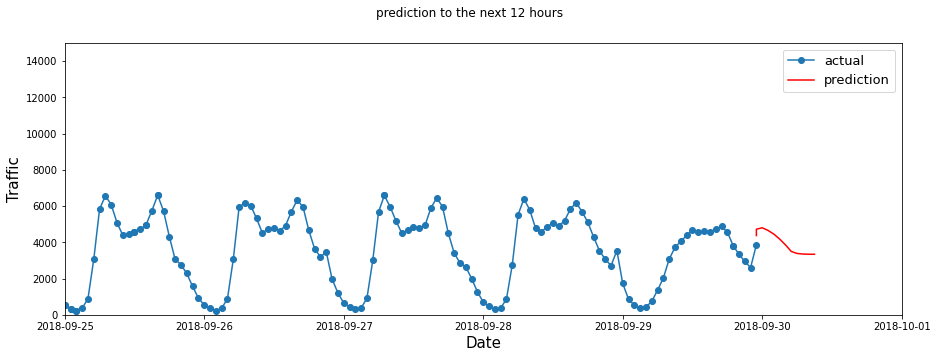

In [52]:
# plot prediction for next 12 hours
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
plt.plot(ts_test.index, ts_test, marker='o', label="actual")
plt.plot(data['2018-09-29 23:00:00':'	2018-09-30 09:00:00'].index, pred, 'r',label="prediction")
ax.set_xbound(lower= datetime.date(2018,9,25), upper=datetime.date(2018,10,1))
plt.legend(fontsize=13)
plt.xlabel('Date', size=15)
plt.ylabel('Traffic',size = 15)
ax.set_ylim(0, 15000)
plot = plt.suptitle('prediction to the next 12 hours')

In [53]:
# save future data 
Future ={'Datetime':date_list,'traffic':list(np.array(pred,dtype=int))}

In [54]:
df_future_12hours=pd.DataFrame(Future)
df_future_12hours

,Datetime,traffic
0,2018-09-29 23:00:00,4372
1,2018-09-30 00:00:00,4723
2,2018-09-30 01:00:00,4803
3,2018-09-30 02:00:00,4656
4,2018-09-30 03:00:00,4453
5,2018-09-30 04:00:00,4179
6,2018-09-30 05:00:00,3860
7,2018-09-30 06:00:00,3495
8,2018-09-30 07:00:00,3385
9,2018-09-30 08:00:00,3352


In [55]:
actual_y = ts_test.iloc[-24:]

In [56]:
actual_y

date_time
2018-09-29 01:00:00     867
2018-09-29 02:00:00     524
2018-09-29 03:00:00     359
2018-09-29 04:00:00     425
2018-09-29 05:00:00     743
2018-09-29 06:00:00    1359
2018-09-29 07:00:00    2036
2018-09-29 08:00:00    3073
2018-09-29 09:00:00    3725
2018-09-29 10:00:00    4059
2018-09-29 11:00:00    4378
2018-09-29 12:00:00    4657
2018-09-29 13:00:00    4553
2018-09-29 14:00:00    4618
2018-09-29 15:00:00    4564
2018-09-29 16:00:00    4735
2018-09-29 17:00:00    4878
2018-09-29 18:00:00    4569
2018-09-29 19:00:00    3818
2018-09-29 19:00:00    3818
2018-09-29 20:00:00    3338
2018-09-29 21:00:00    2950
2018-09-29 22:00:00    2607
2018-09-29 23:00:00    3856
Name: traffic_volume, dtype: int64

In [57]:
ts_test_portion = ts_test.iloc[:-24]

In [58]:
ts_test_portion

date_time
2018-08-30 01:00:00     456
2018-08-30 02:00:00     326
2018-08-30 03:00:00     388
2018-08-30 03:00:00     388
2018-08-30 04:00:00    1008
                       ... 
2018-09-28 20:00:00    3538
2018-09-28 21:00:00    3058
2018-09-28 22:00:00    2713
2018-09-28 23:00:00    3544
2018-09-29 00:00:00    1733
Name: traffic_volume, Length: 944, dtype: int64

In [59]:
# get the next 24 hours of Traffic
from dateutil.relativedelta import relativedelta
start= datetime.datetime.strptime("2018-09-29 00:00:00","%Y-%m-%d %H:%M:%S")
date_list=[start + relativedelta(hours=x) for x in range(0,24)]
future_predictions=pd.DataFrame(index=date_list,columns=df.columns)

In [60]:
# concat the test data with the next 8 houre to predict the future data
data=pd.concat([ts_test_portion,future_predictions],axis=0)

In [61]:
data=data.iloc[:,0]

In [62]:
data

2018-08-30 01:00:00     456.0
2018-08-30 02:00:00     326.0
2018-08-30 03:00:00     388.0
2018-08-30 03:00:00     388.0
2018-08-30 04:00:00    1008.0
                        ...  
2018-09-29 19:00:00       NaN
2018-09-29 20:00:00       NaN
2018-09-29 21:00:00       NaN
2018-09-29 22:00:00       NaN
2018-09-29 23:00:00       NaN
Name: 0, Length: 968, dtype: float64

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


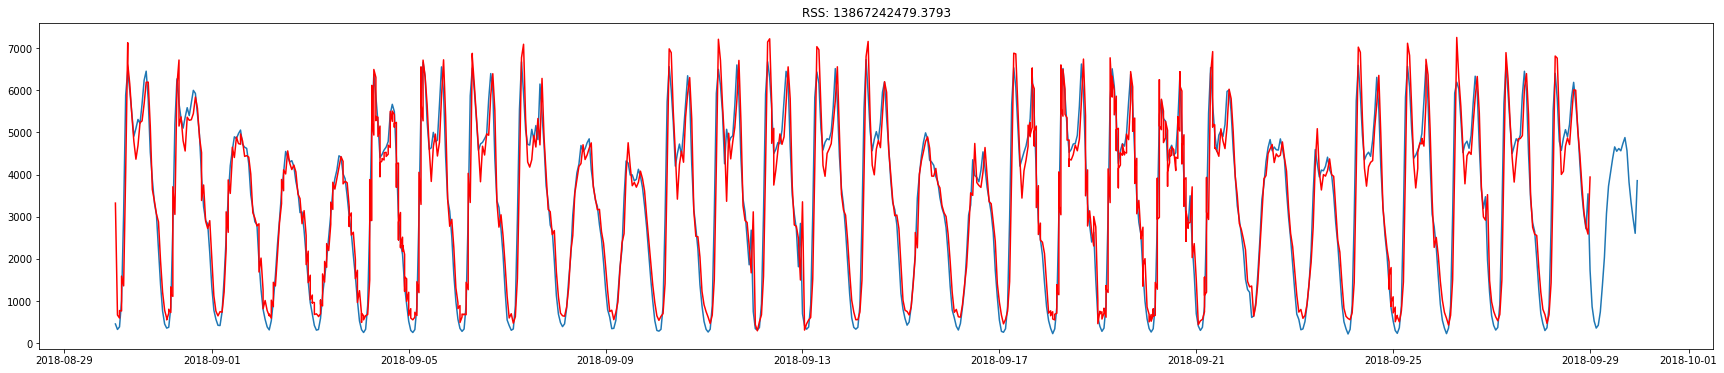

In [63]:
# ARIMA auto autoregressive integrated moving average
model = ARIMA(ts_test_portion, order=(p, d, q))  
results_ARIMA = model.fit(disp=1)
plt.figure(figsize=(30,6))
plt.plot(ts_test)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues).dropna()**2))
plt.show()

In [64]:
pred=results_ARIMA.predict(start=len(ts_test_portion),end=len(data)-1,dynamic=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


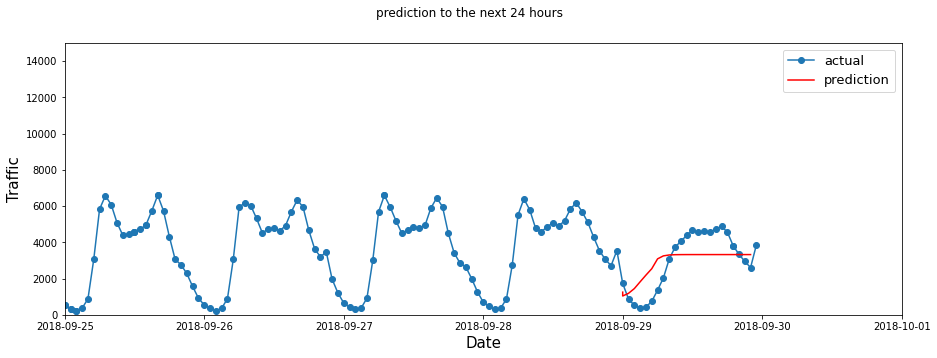

In [65]:
# plot prediction for next 24 hours
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
plt.plot(ts_test.index, ts_test, marker='o', label="actual")
plt.plot(data['2018-09-29 00:00:00':'	2018-09-29 22:00:00'].index, pred, 'r',label="prediction")
ax.set_xbound(lower= datetime.date(2018,9,25), upper=datetime.date(2018,10,1))
plt.legend(fontsize=13)
plt.xlabel('Date', size=15)
plt.ylabel('Traffic',size = 15)
ax.set_ylim(0, 15000)
plot = plt.suptitle('prediction to the next 24 hours')

In [66]:
## error
Future ={'Datetime':date_list,'traffic':list(np.array(pred,dtype=int))}
df_future_24_ahours=pd.DataFrame(Future)
error_24 = mean_absolute_error(actual_y, df_future_24_ahours.iloc[:,1])
print('Test Mean Absolute Error:', mean_absolute_error(actual_y, df_future_24_ahours.iloc[:,1]))

Test Mean Absolute Error: 808.7083333333334


In [67]:
actual_y = ts_test.iloc[-12:]

In [68]:
actual_y

date_time
2018-09-29 13:00:00    4553
2018-09-29 14:00:00    4618
2018-09-29 15:00:00    4564
2018-09-29 16:00:00    4735
2018-09-29 17:00:00    4878
2018-09-29 18:00:00    4569
2018-09-29 19:00:00    3818
2018-09-29 19:00:00    3818
2018-09-29 20:00:00    3338
2018-09-29 21:00:00    2950
2018-09-29 22:00:00    2607
2018-09-29 23:00:00    3856
Name: traffic_volume, dtype: int64

In [69]:
ts_test_portion = ts_test.iloc[:-12]

In [70]:
# get the next 12 hours of Traffic
from dateutil.relativedelta import relativedelta
start= datetime.datetime.strptime("2018-09-29 12:00:00","%Y-%m-%d %H:%M:%S")
date_list=[start + relativedelta(hours=x) for x in range(0,12)]
future_predictions=pd.DataFrame(index=date_list,columns=df.columns)

In [71]:
# concat the test data with the next 8 houre to predict the future data
data=pd.concat([ts_test_portion,future_predictions],axis=0)

In [72]:
data=data.iloc[:,0]

In [73]:
data

2018-08-30 01:00:00     456.0
2018-08-30 02:00:00     326.0
2018-08-30 03:00:00     388.0
2018-08-30 03:00:00     388.0
2018-08-30 04:00:00    1008.0
                        ...  
2018-09-29 19:00:00       NaN
2018-09-29 20:00:00       NaN
2018-09-29 21:00:00       NaN
2018-09-29 22:00:00       NaN
2018-09-29 23:00:00       NaN
Name: 0, Length: 968, dtype: float64

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


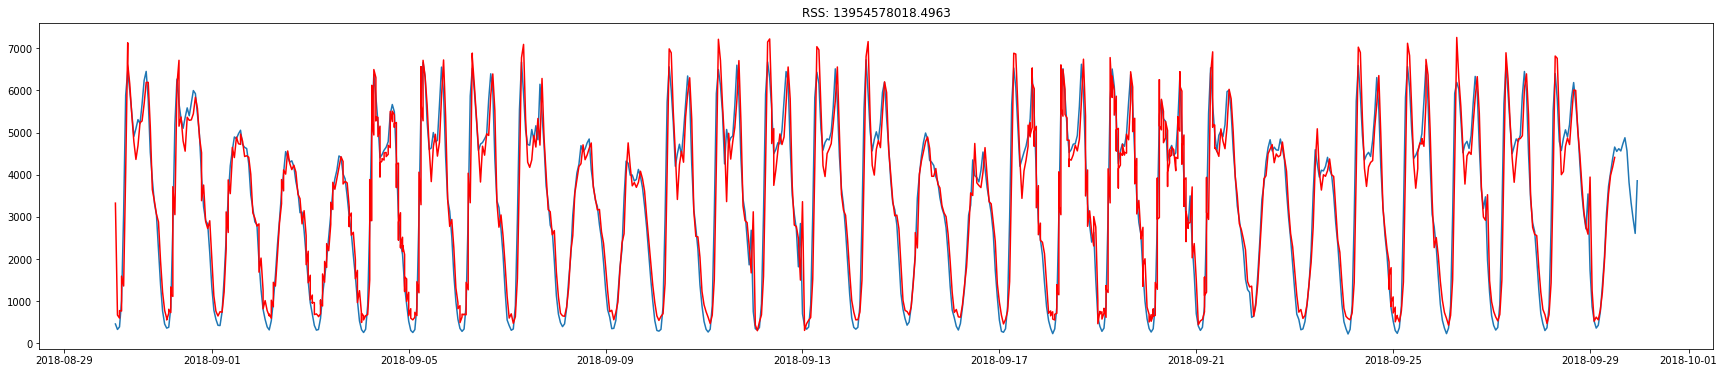

In [74]:
# ARIMA auto autoregressive integrated moving average
model = ARIMA(ts_test_portion, order=(p, d, q))  
results_ARIMA = model.fit(disp=1)
plt.figure(figsize=(30,6))
plt.plot(ts_test)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues).dropna()**2))
plt.show()

In [75]:
pred=results_ARIMA.predict(start=len(ts_test_portion),end=len(data)-1,dynamic=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


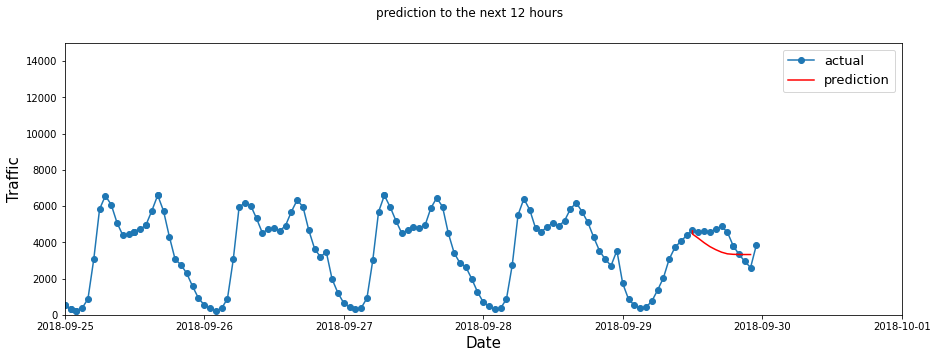

In [76]:
# plot prediction for next 12 hours
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
plt.plot(ts_test.index, ts_test, marker='o', label="actual")
plt.plot(data['2018-09-29 12:00:00':'2018-09-29 22:00:00'].index, pred, 'r',label="prediction")
ax.set_xbound(lower= datetime.date(2018,9,25), upper=datetime.date(2018,10,1))
plt.legend(fontsize=13)
plt.xlabel('Date', size=15)
plt.ylabel('Traffic',size = 15)
ax.set_ylim(0, 15000)
plot = plt.suptitle('prediction to the next 12 hours')

In [77]:
## error
Future ={'Datetime':date_list,'traffic':list(np.array(pred,dtype=int))}
df_future_12_ahours=pd.DataFrame(Future)
error_12 = mean_absolute_error(actual_y, df_future_12_ahours.iloc[:,1])
print('Test Mean Absolute Error:', mean_absolute_error(actual_y, df_future_12_ahours.iloc[:,1]))

Test Mean Absolute Error: 488.9166666666667


In [78]:
actual_y = ts_test.iloc[-8:]
ts_test_portion = ts_test.iloc[:-8]

In [79]:
ts_test_portion

date_time
2018-08-30 01:00:00     456
2018-08-30 02:00:00     326
2018-08-30 03:00:00     388
2018-08-30 03:00:00     388
2018-08-30 04:00:00    1008
                       ... 
2018-09-29 12:00:00    4657
2018-09-29 13:00:00    4553
2018-09-29 14:00:00    4618
2018-09-29 15:00:00    4564
2018-09-29 16:00:00    4735
Name: traffic_volume, Length: 960, dtype: int64

In [80]:
# get the next 8 hours of Traffic
from dateutil.relativedelta import relativedelta
start= datetime.datetime.strptime("2018-09-29 16:00:00","%Y-%m-%d %H:%M:%S")
date_list=[start + relativedelta(hours=x) for x in range(0,8)]
future_predictions=pd.DataFrame(index=date_list,columns=df.columns)

In [81]:
# concat the test data with the next 8 houre to predict the future data
data=pd.concat([ts_test_portion,future_predictions],axis=0)

In [82]:
data=data.iloc[:,0]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


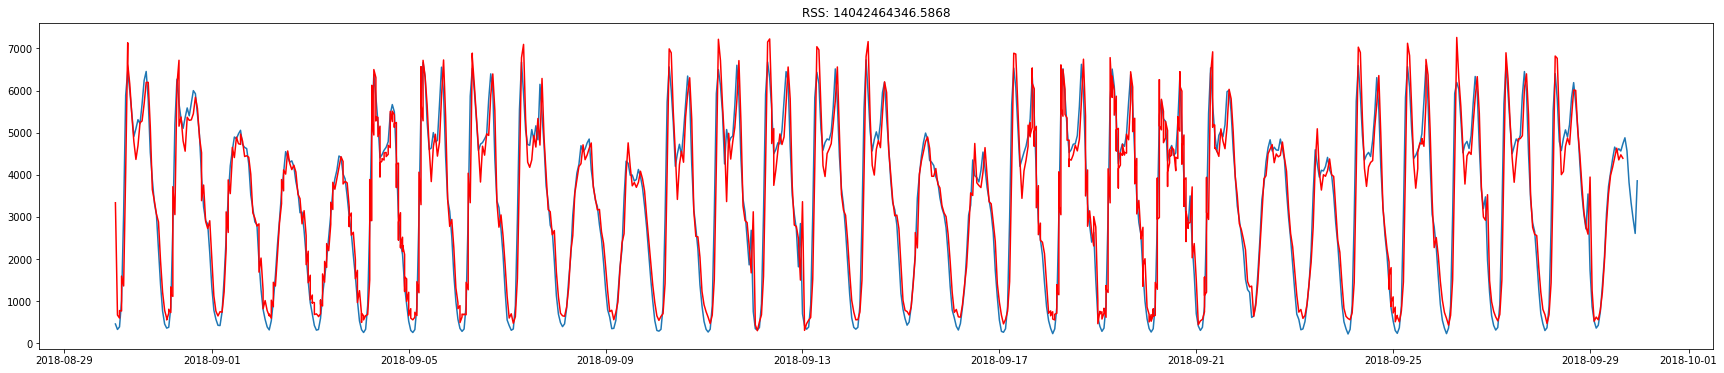

In [83]:
# ARIMA auto autoregressive integrated moving average
model = ARIMA(ts_test_portion, order=(p, d, q))  
results_ARIMA = model.fit(disp=1)
plt.figure(figsize=(30,6))
plt.plot(ts_test)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues).dropna()**2))
plt.show()

In [84]:
pred=results_ARIMA.predict(start=len(ts_test_portion),end=len(data)-1,dynamic=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [85]:
pred

960    4648.361028
961    4491.904549
962    4263.302685
963    4034.843929
964    3839.684643
965    3642.439912
966    3497.328529
967    3384.848771
dtype: float64

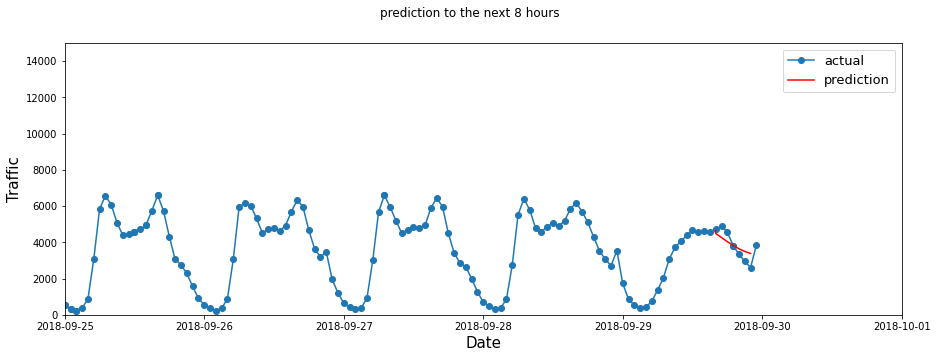

In [86]:
# plot prediction for next 8 hours
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
plt.plot(ts_test.index, ts_test, marker='o', label="actual")
plt.plot(data['2018-09-29 16:00:00':'2018-09-29 22:00:00'].index, pred, 'r',label="prediction")
ax.set_xbound(lower= datetime.date(2018,9,25), upper=datetime.date(2018,10,1))
plt.legend(fontsize=13)
plt.xlabel('Date', size=15)
plt.ylabel('Traffic',size = 15)
ax.set_ylim(0, 15000)
plot = plt.suptitle('prediction to the next 8 hours')

In [87]:
## error
Future ={'Datetime':date_list,'traffic':list(np.array(pred,dtype=int))}
df_future_8_ahours=pd.DataFrame(Future)
error_8 = mean_absolute_error(actual_y, df_future_8_ahours.iloc[:,1])
print('Test Mean Absolute Error:', mean_absolute_error(actual_y, df_future_8_ahours.iloc[:,1]))

Test Mean Absolute Error: 440.5


Text(0, 0.5, 'MAE value')

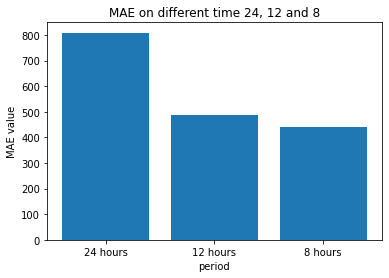

In [89]:
error = ['24 hours','12 hours','8 hours']
value = [error_24,error_12,error_8]
plt.bar(error,value)
plt.title('MAE on different time 24, 12 and 8')
plt.xlabel('period')
plt.ylabel('MAE value')